In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [129]:
data = pd.read_csv("heart_attack_prediction_dataset.csv")

In [130]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [108]:
data.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [132]:
data.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [133]:
ctg_data = data[['Sex','Diet','Continent','Country','Hemisphere']]
data = pd.get_dummies(data, columns = ['Sex'])
# sex_map = {'Male':1,'Female':2}
# data['Sex']=data['Sex'].map(sex_map)

In [134]:
data['BP_Systolic'] = data['Blood Pressure'].apply(lambda x: x.split('/')[0])
data['BP_Diastolic'] = data['Blood Pressure'].apply(lambda x: x.split('/')[1])

In [135]:
ordinal_map = {'Healthy':3,'Average':2,'Unhealthy':1}
data['Diet'] = data['Diet'].map(ordinal_map)

In [136]:
cat_columns = ['Sex_Female','Sex_Male','BP_Systolic','BP_Diastolic']
data[cat_columns] = data[cat_columns].astype(int)

In [28]:
# plt.figure(figsize=(8, 7))
# for i in ctg_data.columns:
#     ctg_num = ctg_data[i].value_counts()
#     chart = sns.barplot(x = ctg_num.index, y = ctg_num)
#     for p in chart.patches:
#         chart.annotate(format(p.get_height(), '.0f'), 
#                      (p.get_x() + p.get_width() / 2., p.get_height()), 
#                      ha = 'center', va = 'center', 
#                      xytext = (0, 10), 
#                      textcoords = 'offset points',
#                      fontsize=10)
        
#     chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
#     plt.show() 

<Axes: >

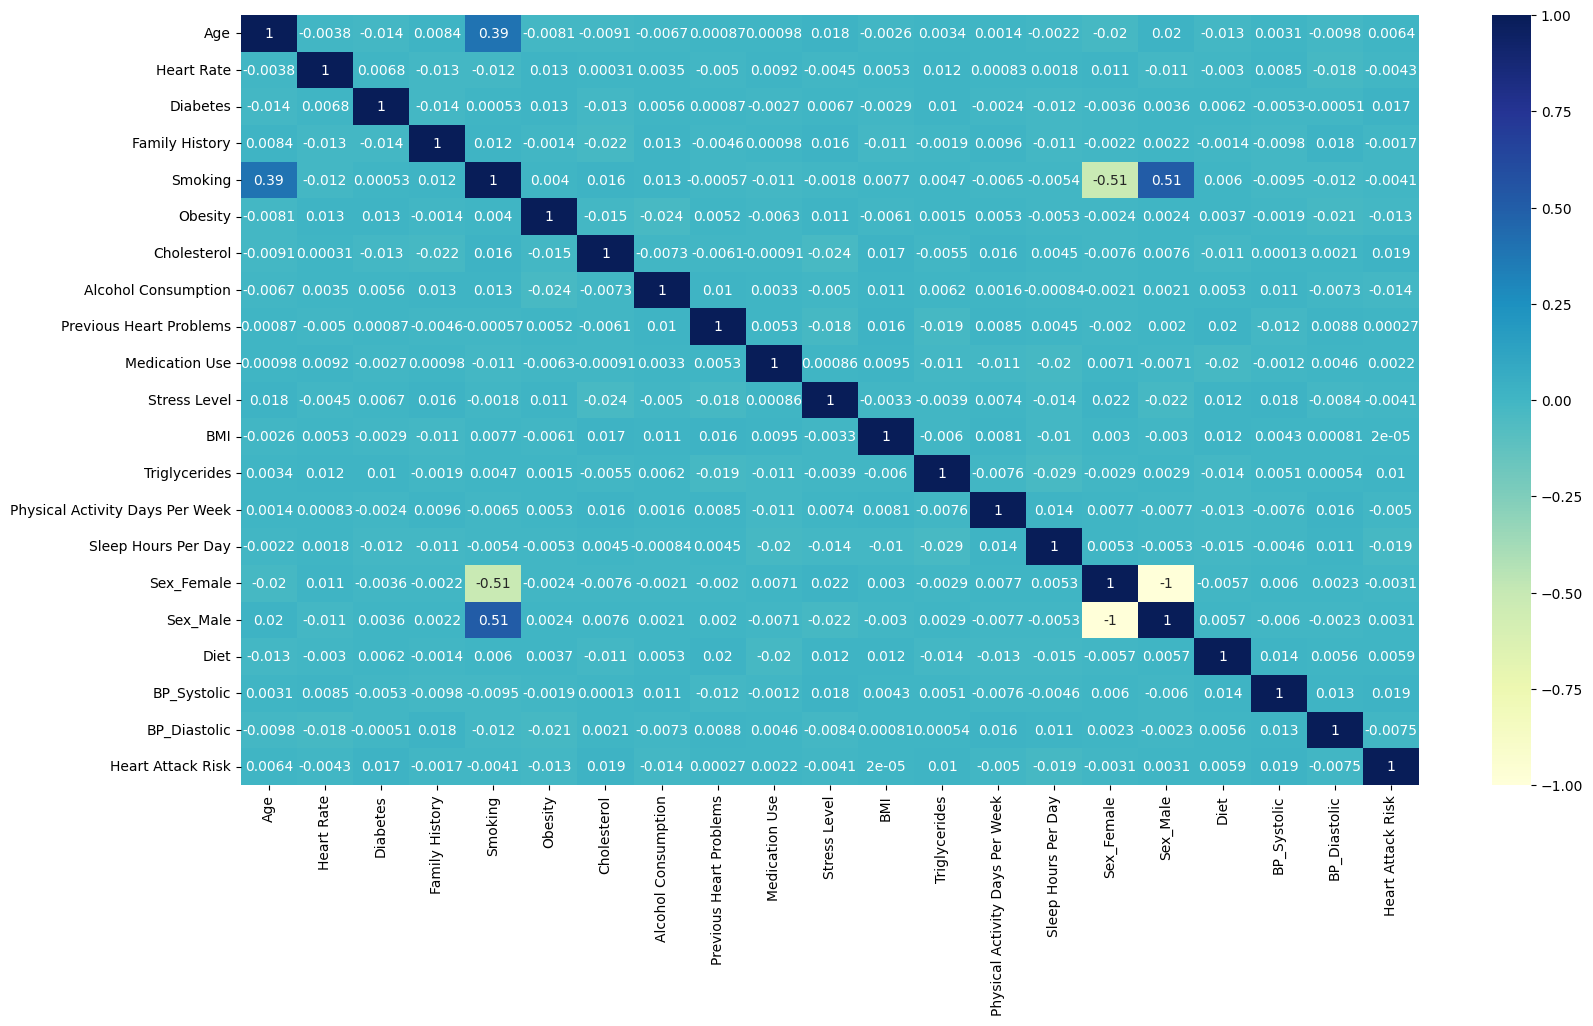

In [137]:
plt.figure(figsize = (19,10))
sns.heatmap(data[['Age','Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
      'Cholesterol','Alcohol Consumption', 
      'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Sex_Female','Sex_Male','Diet','BP_Systolic','BP_Diastolic',
       'Heart Attack Risk']].corr(), cmap="YlGnBu",
            annot=True)

In [13]:
#data = pd.get_dummies(data, columns = ['Country','Continent','Hemisphere'])

In [175]:
data.dtypes

Patient ID                          object
Age                                  int64
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent                           object
Hemisphere 

In [95]:
data.columns

Index(['Patient ID', 'Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate',
       'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk', 'Sex_Female',
       'Sex_Male', 'BP_Systolic', 'BP_Diastolic'],
      dtype='object')

In [138]:
X = data [['Age', 'Cholesterol', 'Heart Rate',
       'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'BP_Systolic', 'BP_Diastolic', 'Sex_Female',
       'Sex_Male']]
Y = data [['Heart Attack Risk']]


In [139]:
train_x = X
train_y = Y

In [140]:
X.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Diet,Previous Heart Problems,Medication Use,Stress Level,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,BP_Systolic,BP_Diastolic,Sex_Female,Sex_Male
0,67,208,72,0,0,1,0,0,2,0,0,9,31.251233,286,0,6,158,88,0,1
1,21,389,98,1,1,1,1,1,1,1,0,1,27.194973,235,1,7,165,93,0,1
2,21,324,72,1,0,0,0,0,3,1,1,9,28.176571,587,4,4,174,99,1,0
3,84,383,73,1,1,1,0,1,2,1,0,9,36.464704,378,3,4,163,100,0,1
4,66,318,93,1,1,1,1,0,1,1,0,6,21.809144,231,1,5,91,88,0,1


In [170]:
hidden_units=100
learning_rate=0.001
hidden_layer_act='tanh'
output_layer_act='sigmoid'
no_epochs=100
input_dim = X.columns.size
print("input dimension: ",input_dim)

input dimension:  20


In [171]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_dim, activation=hidden_layer_act))
model.add(Dense(hidden_units, activation=hidden_layer_act))
model.add(Dense(1, activation=output_layer_act))

In [173]:
sgd=optimizers.SGD(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy',optimizer=sgd, metrics=['acc'])

In [174]:
train_x = np.asarray(X).astype('int64')
train_x = np.asarray(X).astype('uint8')
#X_train= np.reshape(train_x,(train_x.shape[0],train_x.shape[1],train_x.shape[2],1))
model.fit(train_x, train_y, epochs=no_epochs, batch_size=len(data),  verbose=2)

Epoch 1/100
1/1 - 1s - loss: 0.8051 - acc: 0.4445 - 835ms/epoch - 835ms/step
Epoch 2/100
1/1 - 0s - loss: 0.7981 - acc: 0.4478 - 79ms/epoch - 79ms/step
Epoch 3/100
1/1 - 0s - loss: 0.7915 - acc: 0.4504 - 73ms/epoch - 73ms/step
Epoch 4/100
1/1 - 0s - loss: 0.7853 - acc: 0.4522 - 81ms/epoch - 81ms/step
Epoch 5/100
1/1 - 0s - loss: 0.7794 - acc: 0.4558 - 65ms/epoch - 65ms/step
Epoch 6/100
1/1 - 0s - loss: 0.7740 - acc: 0.4597 - 46ms/epoch - 46ms/step
Epoch 7/100
1/1 - 0s - loss: 0.7689 - acc: 0.4631 - 47ms/epoch - 47ms/step
Epoch 8/100
1/1 - 0s - loss: 0.7640 - acc: 0.4663 - 83ms/epoch - 83ms/step
Epoch 9/100
1/1 - 0s - loss: 0.7595 - acc: 0.4708 - 47ms/epoch - 47ms/step
Epoch 10/100
1/1 - 0s - loss: 0.7552 - acc: 0.4753 - 66ms/epoch - 66ms/step
Epoch 11/100
1/1 - 0s - loss: 0.7512 - acc: 0.4801 - 67ms/epoch - 67ms/step
Epoch 12/100
1/1 - 0s - loss: 0.7475 - acc: 0.4836 - 57ms/epoch - 57ms/step
Epoch 13/100
1/1 - 0s - loss: 0.7440 - acc: 0.4860 - 55ms/epoch - 55ms/step
Epoch 14/100
1/1 - 